In [1]:
import matplotlib.pyplot as plt
from coffea.util import load
from pocket_coffea.utils.plot_utils import Shape
from pocket_coffea.parameters.plotting import style_cfg

In [2]:
filename = "/work/mmarcheg/PocketCoffea/output/datamc/ttHbb_ttbar_ST_WJets_datamc_2018_MuonIsoTight_bugfix/output_all.coffea"
o = load(filename)
histname = "ElectronGood_pt_1"
h_dict = o["variables"][histname]
h_dict.keys()

dict_keys(['ttHTobb', 'TTToSemiLeptonic', 'DATA_SingleEle', 'DATA_SingleMuon', 'WJetsToLNu_HT', 'SingleTop', 'TTTo2L2Nu'])

## Modify the default style config
As a test, we can modify the entries of the style config dictionary in order to:

- have unstacked plots for MC with a `step` style.
- group the `TTToSemiLeptonic` and `TTTo2L2Nu` in a single sample `ttbar`

In [3]:
style_cfg["opts_mc"]

{'histtype': 'fill', 'stack': True}

In [4]:
style_cfg["opts_mc"]["histtype"] = "step"
style_cfg["opts_mc"]["stack"] = False
style_cfg["samples_map"] = {"ttbar" : ["TTToSemiLeptonic", "TTTo2L2Nu"]}
print(style_cfg["opts_mc"])
print(style_cfg["samples_map"])

{'histtype': 'step', 'stack': False}
{'ttbar': ['TTToSemiLeptonic', 'TTTo2L2Nu']}


## Define Shape object

In [5]:
shape = Shape(h_dict, histname, plot_dir='plots/', style_cfg=style_cfg, density=True)
shape

## Samples after regrouping
The regrouping of the samples is done internally in the Shape object by reading the dictionary `samples_map` in the style config.

In [6]:
shape.h_dict.keys()

dict_keys(['ttbar', 'ttHTobb', 'DATA_SingleEle', 'DATA_SingleMuon', 'WJetsToLNu_HT', 'SingleTop'])

In [7]:
shape.samples_mc

['ttbar', 'ttHTobb', 'WJetsToLNu_HT', 'SingleTop']

## Density plot

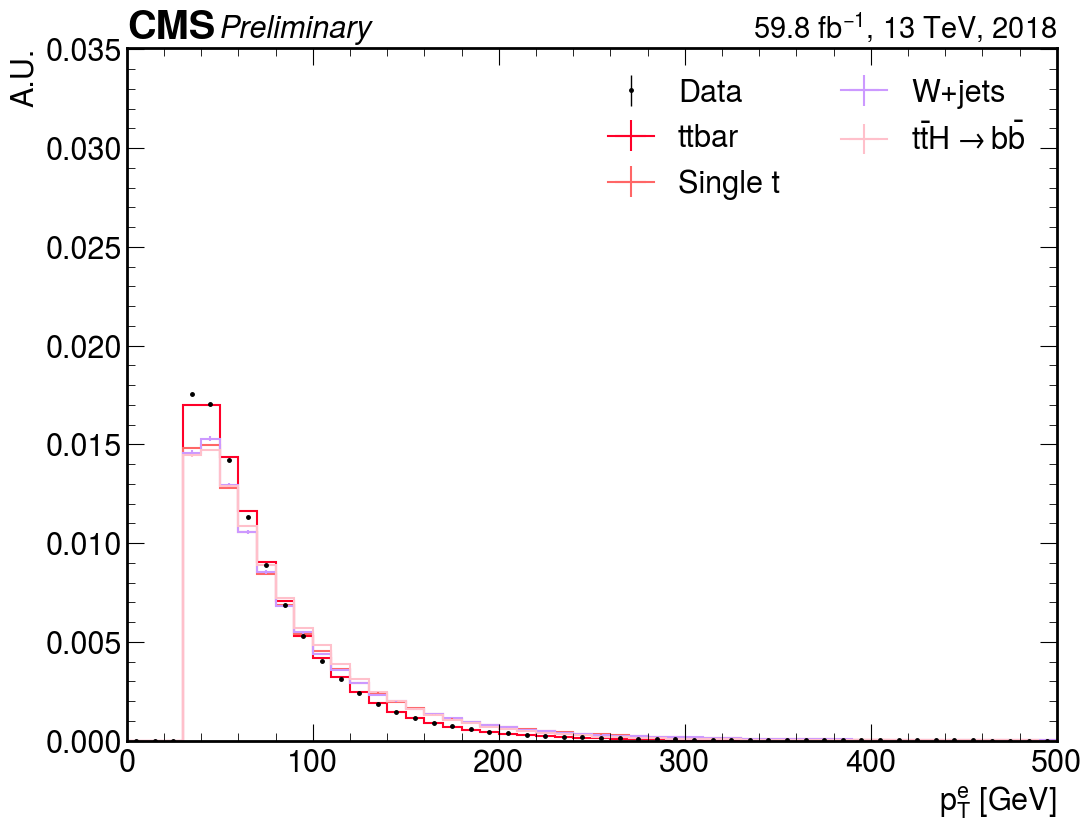

In [8]:
year = "2018"
shape.build_stacks(year, 'SingleEle_1b')
shape.plot_data(year)
shape.plot_mc()
plt.show()
plt.close()